In [2]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [4]:
from tensorflow import keras
keras.__version__

'3.6.0'

In [9]:
from keras import datasets

In [10]:
mnist = datasets.mnist

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

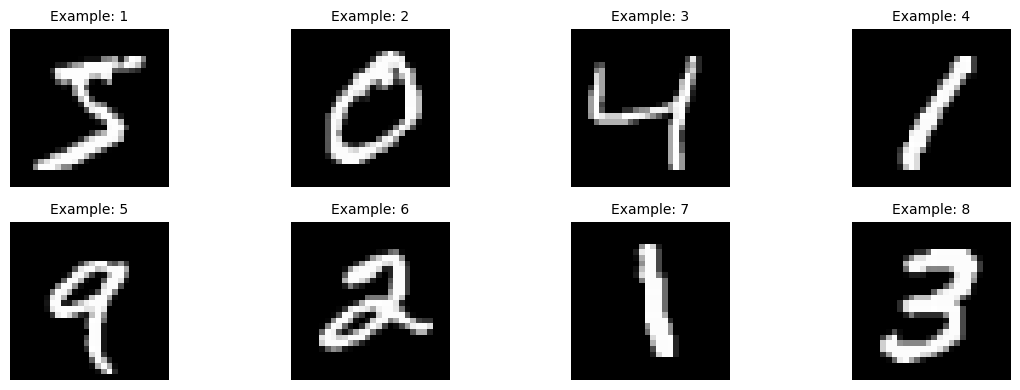

In [25]:
plt.figure(figsize=(12, 4)) 
for index, digit in zip(range(1, 9), X_train[:8]):
    plt.subplot(2, 4, index)
    plt.imshow(np.reshape(digit, newshape=(28, 28)), cmap=plt.cm.gray)
    plt.title(f"Example: {index}", fontsize=10) 
    plt.axis('off')  

plt.tight_layout()  
plt.show()


In [26]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [28]:
X_test.shape,  y_test.shape

((5000, 28, 28), (5000,))

In [29]:
from keras import models
from keras import layers

In [30]:
network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10,activation='softmax'))

c:\Users\carva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
network.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [35]:
hidden1 = network._layers[1]
hidden1

<Dense name=dense, built=True>

In [39]:
weights, biases = hidden1.get_weights()

In [41]:
weights

array([[-0.01093087, -0.01186579,  0.00930574, ...,  0.00109436,
        -0.06180801, -0.04028428],
       [-0.00136846,  0.01341913,  0.0174966 , ...,  0.02864897,
        -0.00604588,  0.03334811],
       [ 0.06363463, -0.04913066, -0.06922967, ...,  0.04784621,
         0.00261254, -0.04294895],
       ...,
       [-0.03470355, -0.0120541 , -0.0381744 , ..., -0.04589867,
        -0.01126597,  0.02192517],
       [-0.03675778,  0.02806459, -0.0587258 , ..., -0.00644737,
        -0.0410609 , -0.04930641],
       [ 0.0007176 , -0.03151052, -0.05438685, ...,  0.06215283,
        -0.01078864, -0.0679854 ]], dtype=float32)

In [42]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [43]:
network.compile(optimizer='sgd',
        loss="categorical_crossentropy",
        metrics=['accuracy', 'precision'])

In [44]:
X_train_prep = X_train.reshape((60000, 28*28))
X_train_prep = X_train_prep.astype('float32')/255

X_test_prep = X_test.reshape((5000, 28*28))
X_test_prep = X_test_prep.astype('float32')/255

X_val_prep = X_val.reshape((5000, 28*28))
X_val_prep = X_val_prep.astype('float32')/255


In [45]:
X_train.shape, X_train_prep.shape

((60000, 28, 28), (60000, 784))

In [46]:
from keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)
y_val_prep = to_categorical(y_val)

In [47]:
history = network.fit(X_train_prep,
                      y_train_prep,
                      epochs=30,
                      validation_data=(X_val_prep, y_val_prep))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7546 - loss: 0.9805 - precision: 0.9121 - val_accuracy: 0.9178 - val_loss: 0.2886 - val_precision: 0.9454
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9171 - loss: 0.2921 - precision: 0.9426 - val_accuracy: 0.9346 - val_loss: 0.2274 - val_precision: 0.9516
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9348 - loss: 0.2300 - precision: 0.9529 - val_accuracy: 0.9442 - val_loss: 0.1941 - val_precision: 0.9563
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9462 - loss: 0.1963 - precision: 0.9598 - val_accuracy: 0.9506 - val_loss: 0.1686 - val_precision: 0.9630
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9542 - loss: 0.1632 - precision: 0.9655 - val_accuracy: 0.9562 - val_loss: 0.1508 - val_precision: 0.9651
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9596 - loss: 0.1431 - precision: 0.9697 - val_accuracy: 0.9608